# Project ID - #CC69852 
Project Title - Demand Forecasting for a Retail Store 
Internship Domain - Data Science Intern 
Project Level - Intermediate Level 
Assigned By- CodeClause Internship 
Assigned To- Ashutosh Kumar 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import calendar
%matplotlib inline

In [2]:
df=pd.read_csv("Retail_Dataset2.csv")

In [3]:
df.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169211 entries, 0 to 169210
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product_id        169211 non-null  int64 
 1   Product_Code      169211 non-null  object
 2   Warehouse         169211 non-null  object
 3   Product_Category  169211 non-null  object
 4   Date              169211 non-null  object
 5   Order_Demand      169211 non-null  int64 
 6   Open              169211 non-null  int64 
 7   Promo             169211 non-null  int64 
 8   StateHoliday      169211 non-null  object
 9   SchoolHoliday     169211 non-null  int64 
 10  Petrol_price      169211 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 14.2+ MB


In [5]:
df.shape

(169211, 11)

In [6]:
df.isnull().sum()


Product_id          0
Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
Open                0
Promo               0
StateHoliday        0
SchoolHoliday       0
Petrol_price        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Product_id,Order_Demand,Open,Promo,SchoolHoliday,Petrol_price
count,1.692110e+05,1.692110e+05,169211.000000,169211.000000,169211.000000,169211.000000
mean,9.528887e+05,5.248118e+03,0.817742,0.395364,0.133401,87.986183
std,5.555751e+04,3.116296e+04,0.386058,0.488930,0.340009,4.909978
min,6.909430e+05,0.000000e+00,0.000000,0.000000,0.000000,80.000000
25%,9.054275e+05,2.000000e+01,1.000000,0.000000,0.000000,84.000000
50%,9.526430e+05,3.000000e+02,1.000000,0.000000,0.000000,88.000000
75%,1.001416e+06,2.000000e+03,1.000000,1.000000,0.000000,92.000000
max,1.048574e+06,2.500000e+06,1.000000,1.000000,1.000000,96.000000


In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['month'] = df['Date'].dt.month

In [10]:
df["Product_Code"].value_counts()

Product_1359    2607
Product_1378    1674
Product_1295    1627
Product_1382    1467
Product_1453    1450
                ... 
Product_1405       1
Product_0428       1
Product_1698       1
Product_0484       1
Product_2117       1
Name: Product_Code, Length: 2117, dtype: int64

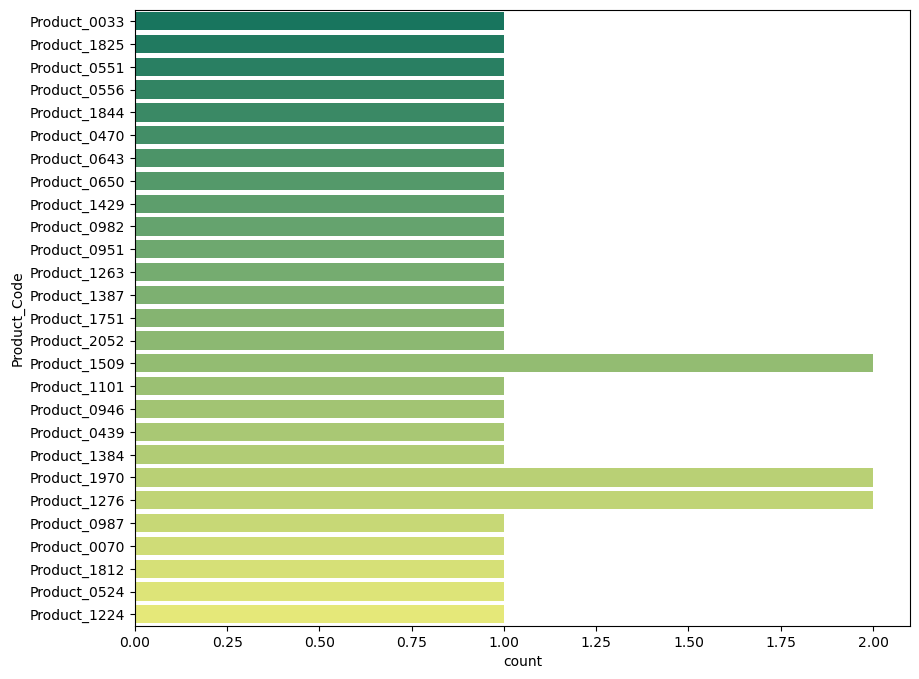

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(y="Product_Code",data=df[: 30],palette="summer")
plt.show()

In [12]:
df["Warehouse"].value_counts()

Whse_J    131102
Whse_A     23157
Whse_C      9142
Whse_S      5810
Name: Warehouse, dtype: int64

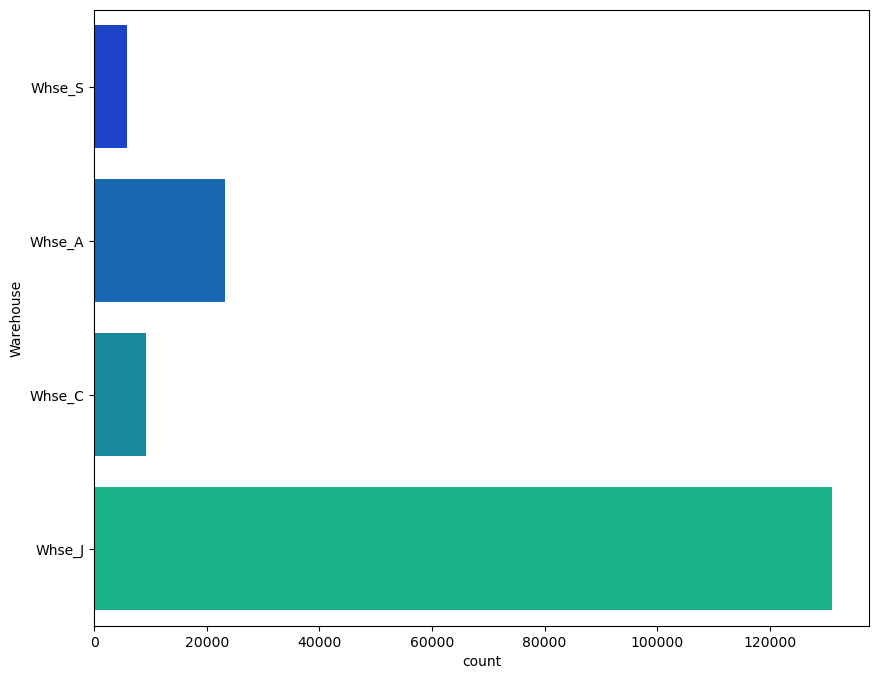

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(y="Warehouse",data=df,palette="winter")
plt.show()

In [14]:
df["Product_Category"].value_counts()

Category_019    76640
Category_005    17831
Category_001    17599
Category_007    12643
Category_021     7890
Category_006     5877
Category_028     4972
Category_015     3672
Category_011     3255
Category_009     3245
Category_024     2987
Category_026     2892
Category_030     2144
Category_023     1314
Category_032     1250
Category_022      965
Category_018      856
Category_003      793
Category_013      521
Category_012      407
Category_033      338
Category_031      332
Category_008      234
Category_010      202
Category_017      142
Category_029      129
Category_020       49
Category_016       19
Category_027        9
Category_014        4
Name: Product_Category, dtype: int64

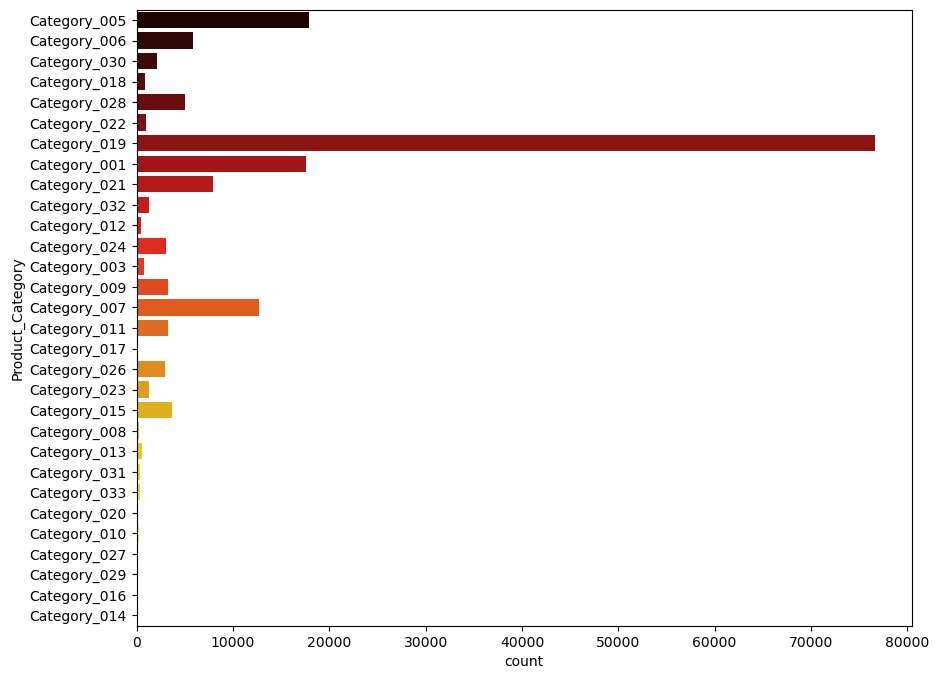

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(y="Product_Category",data=df,palette="hot")
plt.show()

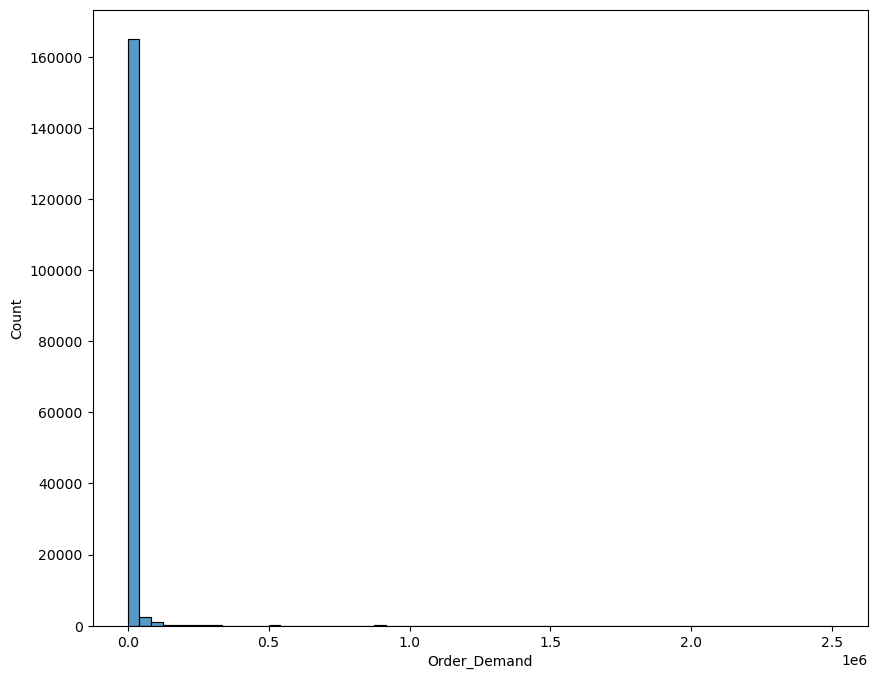

In [16]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x="Order_Demand", bins=60)
plt.show()

In [17]:
df["Open"].value_counts()

1    138371
0     30840
Name: Open, dtype: int64

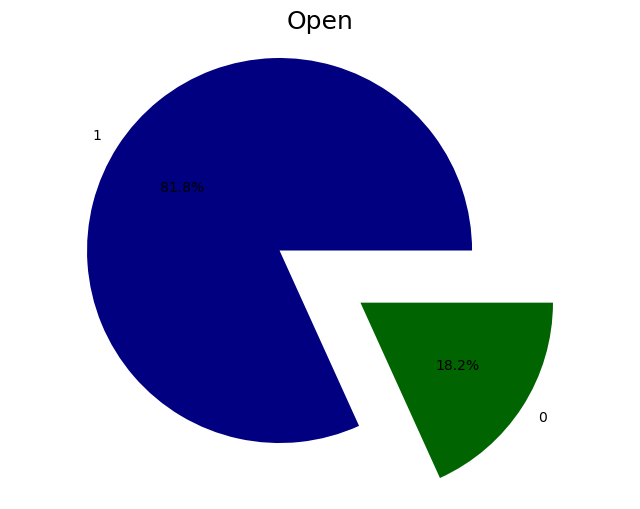

In [18]:
plt.figure(figsize=(8,6))
myexplode = [0.2, 0.3]
op= df['Open'].value_counts()
plt.pie(op.values, labels=op.index, autopct= '%1.1f%%', colors=['navy','darkgreen'],explode=myexplode)
plt.axis("equal")
plt.title('Open',fontsize=18)
plt.show()

In [19]:
df["Promo"].value_counts()

0    102311
1     66900
Name: Promo, dtype: int64

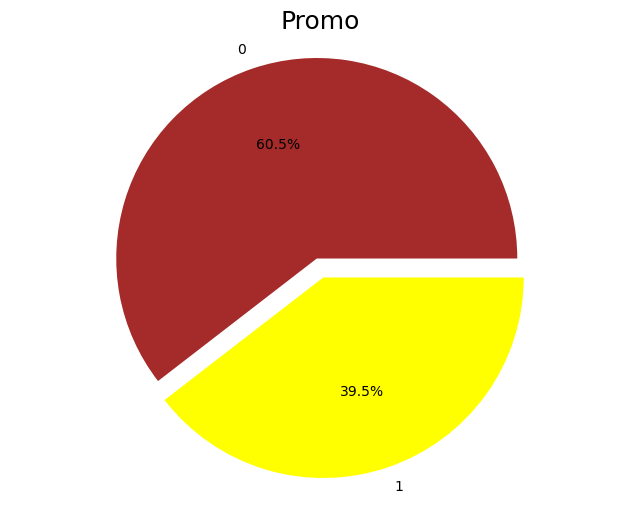

In [20]:
plt.figure(figsize=(8,6))
myexplode = [0.1, 0.0]
pro= df['Promo'].value_counts()
plt.pie(pro.values, labels=pro.index, autopct= '%1.1f%%', colors=['brown','yellow'],explode=myexplode)
plt.axis("equal")
plt.title('Promo',fontsize=18)
plt.show()

In [21]:
df["StateHoliday"].value_counts()

0    161447
a      5534
b      2230
Name: StateHoliday, dtype: int64

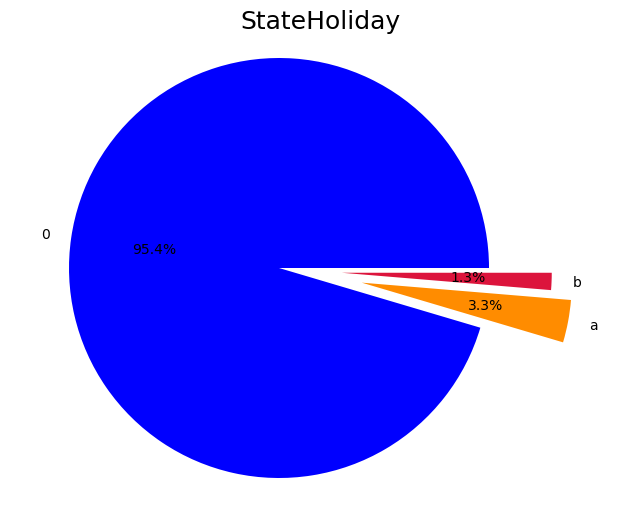

In [22]:
plt.figure(figsize=(8,6))
myexplode = [0.1, 0.3,0.2]
state= df['StateHoliday'].value_counts()
plt.pie(state.values, labels=state.index, autopct= '%1.1f%%', colors=['blue','darkorange',"crimson"],explode=myexplode)
plt.axis("equal")
plt.title('StateHoliday',fontsize=18)
plt.show()

In [23]:
df["SchoolHoliday"].value_counts()

0    146638
1     22573
Name: SchoolHoliday, dtype: int64

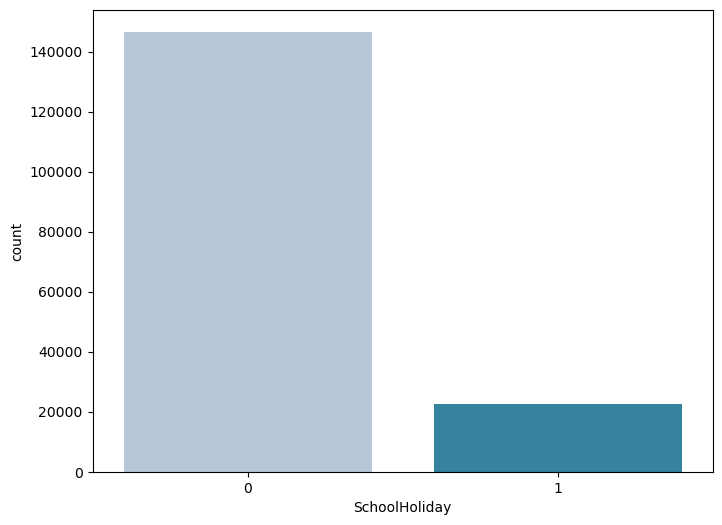

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x="SchoolHoliday",data=df,palette="PuBuGn")
plt.show()

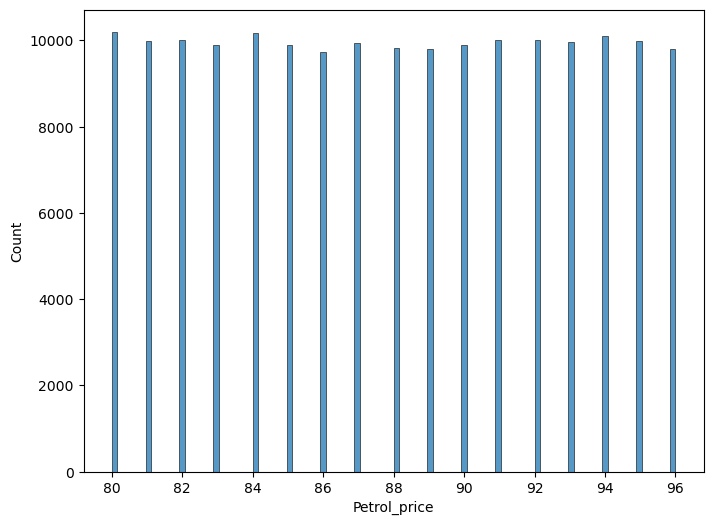

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="Petrol_price",bins=100)
plt.show()

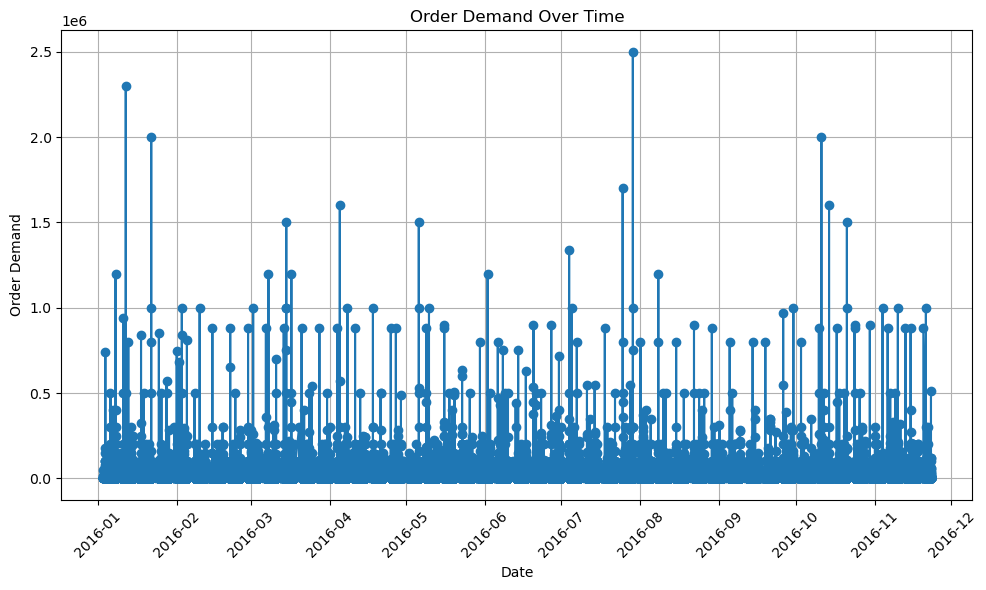

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Order_Demand'], marker='o', linestyle='-')
plt.title('Order Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
df['StateHoliday'].replace({'a': 1, 'b': 2}, inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
col=["Product_Code","Warehouse","Product_Category"]
for x in col:
    
    df[x]=label_encoder.fit_transform(df[x])

In [29]:
df.drop(columns=["Product_id","Date"],axis=1,inplace=True)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

col=["Product_Code",'Order_Demand',"Product_Category"]
df[col]=scaler.fit_transform(df[col])

In [31]:
X=df.drop(columns="Petrol_price",axis=1)
Y=df["Petrol_price"]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [33]:
gb_regressor = GradientBoostingRegressor(n_estimators=200, max_depth=10, random_state=42)
gb_regressor.fit(x_train,y_train)
pred1=gb_regressor.predict(x_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test,pred1)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred1)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred1)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred1)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 4.286503770542283
Mean Squared Error (MSE): 24.755384975109056
R-squared (R2) Score: -0.03247084058465588
Mean Absolute Percentage Error (MAPE): 4.897799394590661


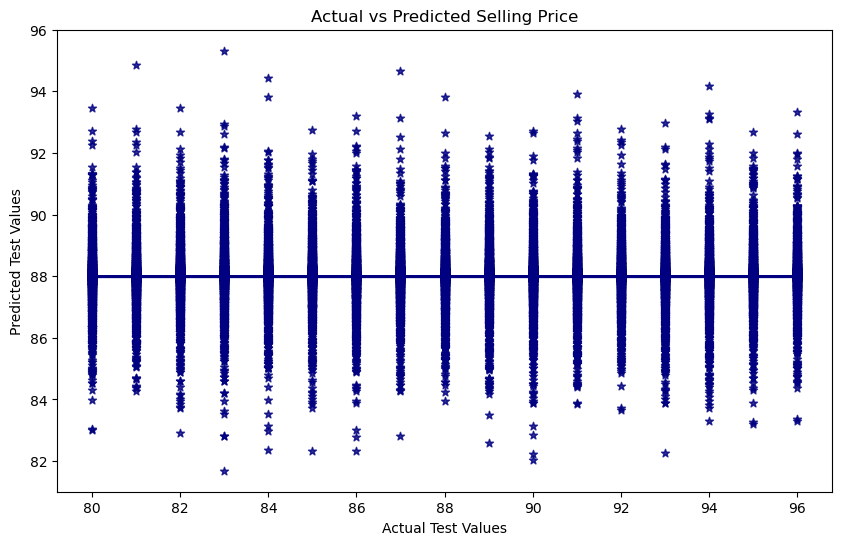

In [35]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred1, color="navy",marker="*",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

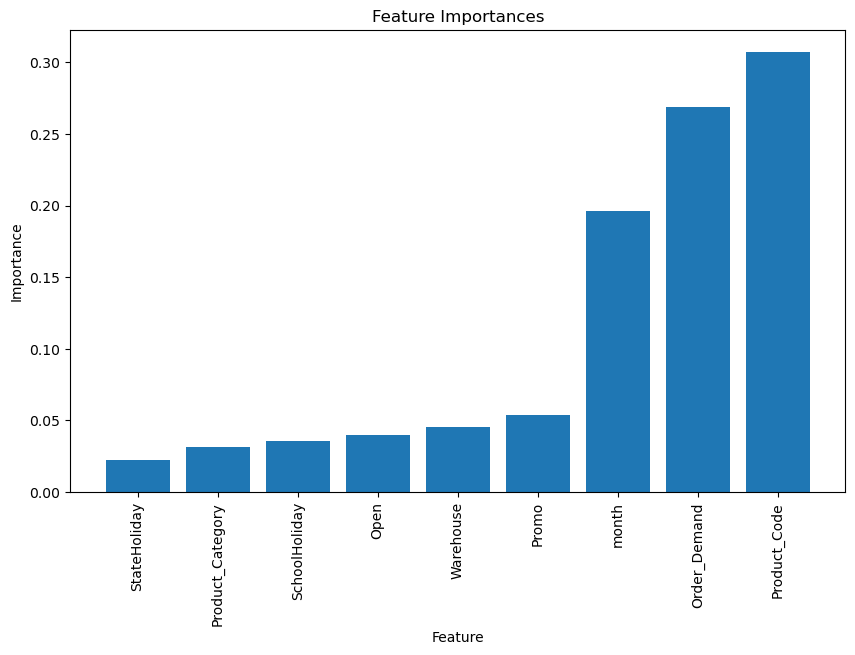

In [36]:
importances = gb_regressor.feature_importances_
feature_names = X.columns 
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train,y_train)
pred2=rf_regressor.predict(x_test)

In [40]:
mae = mean_absolute_error(y_test,pred2)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred2)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred2)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 4.580415222792301
Mean Squared Error (MSE): 29.491140841109065
R-squared (R2) Score: -0.22998462777435402
Mean Absolute Percentage Error (MAPE): 5.230866671172323


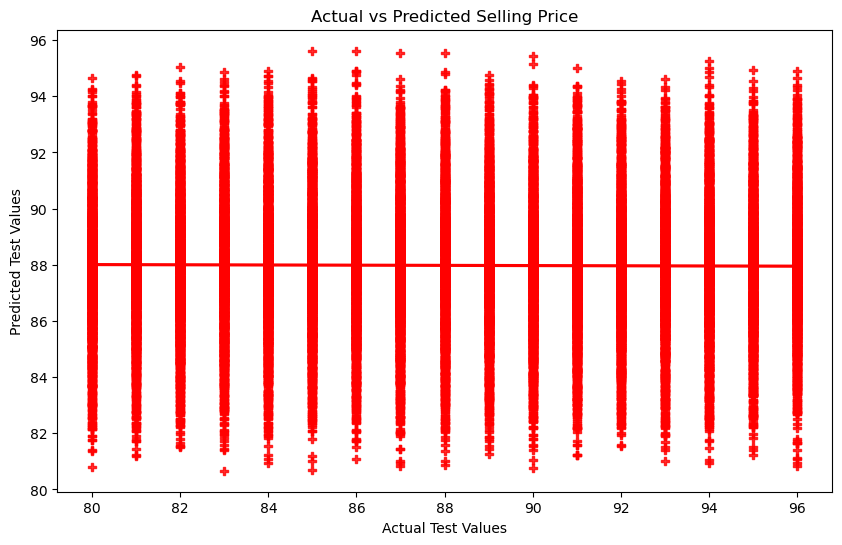

In [41]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred2, color="red",marker="P",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()